## 作業:
作業目標，讓大家熟悉連續型分配的語法，
以及怎麼透過 python 語法進行常態分配的機率運算。


### Q1:計算標準常態分配，小於1的機率有多大?
![](Q1.png)

In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns

In [30]:
import math

SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

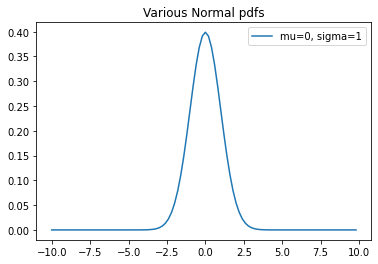

In [54]:
import matplotlib.pyplot as plt
# mu =0
# sigma = 1
xs = [x / 5.0 for x in range(-50, 50)]
# xs = np.linspace(-10, 10, 100)
y = [normal_pdf(x, sigma=1) for x in xs]
# y = stats.norm.pdf(xs, mu, sigma)
plt.plot(xs, y, '-', label='mu=0, sigma=1')

plt.legend()
plt.title('Various Normal pdfs')
plt.show()

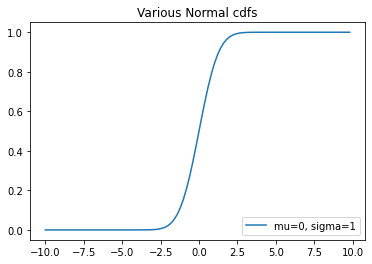

小於1的機率 0.8413447460685428


In [55]:
## Q1
#  提示: 用 cdf 來算
# 3.計算常態分配的累積機率 (cumulative density function)，pdf 的積分
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) /2  # 用 erf 把值限制在 -1~+1

xs = [x / 5.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')

plt.legend(loc=4)  # 放在右下角
plt.title('Various Normal cdfs')
plt.show()

print('小於1的機率', normal_cdf(1, 0, 1))

def normal_probability_above(lo: float,
                             mu: float = 0,
                             sigma: float = 1) -> float:
    '''N(mu, sigma) 大於 lo 的機率'''
    return 1 - normal_cdf(lo, mu, sigma)


# 若低於 hi 且不低於lo, 就表示落在區間之內
def normal_probability_between(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    '''N(mu, sigma) 介於 lo 和 hi 之間的機率'''
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)


# 若不在區間之內，就表示落在區間之外
def normal_probability_outside(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    '''N(mu, sigma) 不介於lo和hi之間的機率'''
    return 1 - normal_probability_between(lo, hi, mu, sigma)

### Q2:計算標準常態分配，大於1，小於 -1 的機率有多大?
![](Q2.png)


In [58]:
print('介於 -1 ~ 1 的機率', normal_probability_between(-1, 1, 0, 1))
print('大於 1，小於 -1 的機率', 1 - normal_probability_between(-1, 1, 0, 1))

介於 -1 ~ 1 的機率 0.6826894921370856
大於 1，小於 -1 的機率 0.31731050786291437


### Q3:X~N(2,4),x 服從常態分配，平均數為2,變異數為 4，計算 X小於 6 的機率有多大?

In [60]:
## Q3
#  提示: 和 Q1,Q2 不同，要先標準化。
# 變異數為4 標準差為2
print('X小於 6 的機率', normal_cdf(6, 2, 2))

X小於 6 的機率 0.9772498680518209


In [59]:
## Q1
## 常態分配的計算
# 計算標準常態分配記Ｘ　介於 1,-1的比例
mu=0
sigma=1
b=  stats.norm.cdf(1,mu, sigma)
print("P(Z<1)=",b)

## Q2
## 先算 p(<-1X<1)，再算  P(X>1 or X<-1)
mu=0
sigma=1
b=  stats.norm.cdf(1,mu, sigma)
a=  stats.norm.cdf(-1,mu, sigma)
print("P(Z>1 or Z<-1)=",1-(b-a))

## Q3
#算法1
mu=0
sigma=1
b=  stats.norm.cdf(2,mu, sigma)
print("P(Z<2)=",b)

#算法2
mu=2
sigma=2 #( 4 要開根號)
b= stats.norm.cdf(6,mu, sigma)
print("P(X<6)=",b)

P(Z<1)= 0.8413447460685429
P(Z>1 or Z<-1)= 0.31731050786291415
P(Z<2)= 0.9772498680518208
P(X<6)= 0.9772498680518208
